In [144]:
import random
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [145]:
import warnings
warnings.filterwarnings("ignore")

# Fonctions utiles

In [146]:
#predictions[i,j] = categorie prédites par le i-ème classifieur pour l'individu j
def votes(predictions, categories, seuil=0.5):
    nb_individus = np.shape(predictions)[1]
    nb_classifieurs = np.shape(predictions)[0]
    res_votes = []
    
    for j in range(nb_individus):
        res_votes.append(vote(predictions[j], categories, nb_classifieurs, seuil))
    
    return res_votes

#Vote pour un seul individu
def vote(predictions, categories, nb_classifieurs, seuil = 0.5):
    nb_votes = np.zeros(len(categories))
    for i in range(nb_classifieurs):
        for c in range(len(categories)):
            if predictions[i] == categories[c]:
                nb_votes[c] +=1

    temp = []
    for c in range(len(categories)):
        if (nb_votes[c]/nb_classifieurs >= seuil):
            temp.append(categories[c])
    if temp == []:
        return "NA"
    else:
        return temp

def accuracy(y_true, y_chap):
    temp = []
    nb_individus = len(y_true)
    for i in range(nb_individus):
        temp.append(y_chap[i] == y_true[i])
    try:
        temp = sum(np.double(temp))/nb_individus
    except ValueError:
        pass
    return temp

# Chargement des données

In [147]:
satimage_data = pd.read_csv("dataset_186_satimage.csv")
satimage_categories = np.unique(satimage_data["class"])
satimage_data.head()

,Aattr,Battr,Cattr,Dattr,Eattr,Fattr,A1attr,B2attr,C3attr,D4attr,...,D22attr,E23attr,F24attr,A25attr,B26attr,C27attr,D28attr,E29attr,F30attr,class
0,0.117596,1.241362,1.184036,0.815302,-0.158561,1.256483,1.193546,0.818486,-0.141965,0.879481,...,0.807707,-0.069968,1.219160,1.250463,0.597678,-0.054291,1.233342,1.262255,0.603258,1.0
1,-1.205362,-1.249654,-0.077532,0.444886,-0.895959,-0.447579,-0.786760,-0.554203,-0.364672,0.092157,...,-0.192752,-0.736996,-0.969292,-0.844805,-0.400030,-0.725852,-0.344432,-0.594534,-0.183967,5.0
2,0.779075,0.148811,0.042617,-0.243030,0.800057,0.164136,0.053370,-0.448612,0.154978,-0.345245,...,-0.877277,0.671174,-0.006373,-0.425752,-0.662584,0.691889,0.356801,-0.175259,-0.236449,7.0
3,1.146564,0.585831,0.342991,0.021553,0.947536,0.601074,0.353416,0.026550,1.788164,1.010702,...,0.281150,1.412317,1.044084,0.532085,0.282612,1.438068,1.058033,0.842981,0.130923,3.0
4,-0.764376,-1.162250,-0.137607,0.180303,-0.969698,-1.146681,-0.126658,0.184937,-0.735851,-1.132569,...,-0.192752,-0.885225,-1.231906,-0.784941,-0.347519,-0.875088,-1.220973,-0.774223,-0.551339,5.0


In [148]:
np.round(100*satimage_data["class"].value_counts()/np.shape(satimage_data)[0], 1)

1.0    23.8
7.0    23.5
3.0    21.1
5.0    11.0
2.0    10.9
4.0     9.7
Name: class, dtype: float64

In [149]:
cancer_data = pd.read_csv("phpAmSP4g.csv")
cancer_categories = np.unique(cancer_data["Class"])
#Y_cancer = cancer_data["Class"]
#cancer_data = cancer_data.drop("Class", 1)
cancer_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [150]:
np.round(100*cancer_data["Class"].value_counts()/np.shape(cancer_data)[0], 1)

1    62.7
2    37.3
Name: Class, dtype: float64

Les catégories sont deséquilibrées pour les deux jeux de données.

# Bagging

## Fonctions

In [151]:
def bootstrap(x):
    return np.sort(np.random.choice(x, len(x)))
                   
def out_of_bag(bootstrap_sample, x):
    return x[np.where(not bootstrap_sample in x)]
                   
class bagging:

    def __init__(self, nb_bootstrap_samples=100, model = "decision_tree"):
        self.nb_bootstrap_samples = nb_bootstrap_samples
        self.model = model
        self.pred = []
        self.trees = []
        self.bootstrap_samples = []
        
    def fit(self, train_data, y, max_depth=1):
        nrow = np.shape(train_data)[0]
        predictions = []
        for i in range(self.nb_bootstrap_samples):
            if self.model == "decision_tree" :
                bootstrap_model = DecisionTreeClassifier(max_depth=max_depth)
            ind_samp = bootstrap(range(nrow))
            self.bootstrap_samples.append(ind_samp)
            samp_data = train_data.iloc[ind_samp]
            self.trees.append(bootstrap_model.fit(X = samp_data, y=y[ind_samp]))

    def predict(self, new_data, categories, seuil=0.5):
        self.pred = []
        for t in self.trees:
            self.pred.append(t.predict(new_data))
        self.pred = pd.DataFrame(self.pred)
        return votes(self.pred, categories= categories, seuil=seuil)
    
    def oob_error(self, categories, y, seuil = 0.51):
        nb_individus = np.shape(self.pred)[1]
        nb_classifieurs = np.shape(self.pred)[0]
        pred = []
        
        for i in range(nb_individus):
            count = 0
            pred_i = []
            for j in range(nb_classifieurs):
                if not i in self.bootstrap_samples[j]:
                    count += 1
                    pred_i.append(self.pred[i][j])
            if count > 0:
                pred.append(vote(pred_i, categories, count, seuil))
            else:
                pred.append(y[i])
        return 1-accuracy(pred, y)

## Une instance de bagging

In [152]:
X = satimage_data.drop("class", 1)
y = np.array(satimage_data["class"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
bag_model = bagging(nb_bootstrap_samples=100, model = "decision_tree")
bag_model.fit(train_data = X_train, y = y_train, max_depth=3)
pred = bag_model.predict(new_data= X_test, categories = satimage_categories, seuil = 0.51)

In [153]:
y_chap = np.array(pred)
acc = accuracy(y_test, y_chap)
print("Accuracy on X_test = %2.3f" % acc)
print("Error on X_test = %2.3f" % (1-acc))

Accuracy on X_test = 0.767
Error on X_test = 0.233


In [154]:
pred = bag_model.predict(new_data= X, categories = satimage_categories, seuil = 0.51)
err = bag_model.oob_error(satimage_categories, y, seuil = 0.51)
print("Out Of Bag Error on X = %2.3f" % err)

Out Of Bag Error on X = 0.229


L'OOB error est du même ordre de grandeur que l'erreur classique sur le jeu de données de test (23,3% contre 22,9%) ce qui confirme que l'OOB error est une bonne estimation de l'erreur de généralisation du modèle.

## Recherche du meilleur nombre d'arbres

On souhaite choisir un nombre d'arbre qui nous donne la meilleure accuracy possible. 

Pour cela, nous allons tester un nombre d'arbres compris entre 2 et 18. Pour chacun de ces nombre, nous construisons 5 instances et nous estimons leurs performances. Nous réduisons ainsi les fluctuations d'échantillonage en calculant l'accuracy moyenne et nous pouvons estimer un écart-type de l'accuracy.

In [139]:
nb_trees = range(2,20,2)
acc = []
kf = KFold(n_splits=5)
for n in nb_trees:
    acc_temp=[]
    for train_index, test_index in kf.split(satimage_data):
        bag_model = bagging(nb_bootstrap_samples=n, model = "decision_tree")
        train_temp = X.loc[train_index,]
        test_temp = X.loc[test_index,]
        y_train_temp = y[train_index]
        y_test_temp = y[test_index]
        
        bag_model.fit(train_data = train_temp, y = y_train_temp, max_depth=3)
        #Seuil = 0.51 pour être sur d'avoir une seule prediction en sortie
        pred = bag_model.predict(new_data= test_temp, categories = satimage_categories, seuil = 0.51)
        acc_temp.append(accuracy(pred, y_test_temp))
    acc.append(acc_temp)

Nb_trees =   2 Accuracy moyenne = 0.740
Nb_trees =   4 Accuracy moyenne = 0.767
Nb_trees =   6 Accuracy moyenne = 0.763
Nb_trees =   8 Accuracy moyenne = 0.764
Nb_trees =  10 Accuracy moyenne = 0.766
Nb_trees =  12 Accuracy moyenne = 0.767
Nb_trees =  14 Accuracy moyenne = 0.769
Nb_trees =  16 Accuracy moyenne = 0.768
Nb_trees =  18 Accuracy moyenne = 0.772


Meilleur Nb_trees =  18 Accuracy moyenne = 0.772


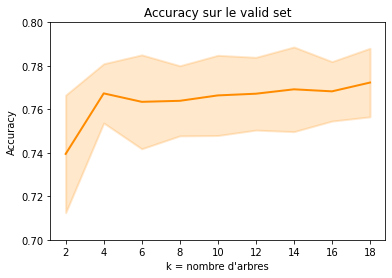

In [140]:
max_i = 0
max_acc = 0
mean_acc = []
std_acc = []
for i in range(9):
    new_acc = np.mean(acc[i])
    mean_acc.append(new_acc)
    new_std = np.std(acc[i])
    std_acc.append(new_std)
    print("Nb_trees = %3.0f Accuracy moyenne = %0.3f"%(i*2+2, new_acc))
    if new_acc > max_acc:
        max_i = i*2+2
        max_acc = new_acc
print("\n\nMeilleur Nb_trees = %3.0f Accuracy moyenne = %0.3f"%(max_i, max_acc))

mean_acc = np.double(mean_acc)
std_acc = np.double(std_acc)
plt.title("Accuracy sur le valid set")
plt.xlabel("k = nombre d'arbres")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0)
lw = 2
param_range = range(2,20, 2)
plt.ylim(0.7, 0.8)
plt.plot(
    param_range, mean_acc, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    mean_acc - std_acc,
    mean_acc + std_acc,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)

Le meilleur nombre d'arbre en moyenne est 18. Cependant, les accuracy moyennes ne sont pas significativement différentes pour un nombre d'arbres compris entre 4 et 18. Il peut être plus prudent de choisir un nombre d'arbre avec un intervale de confiance petit comme c'est le cas pour 16 arbres par exemple.

# Comparaison avec kNN

Nous souhaitons comparer les performances prédictives de l'instance de notre modèle créé précédemment. Elle possède une accuracy de 0.774 sur les données de test.

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
n_neighbors = [1, 2, 3, 4, 5, 7, 10, 20, 30, 40, 50]
acc_knn = []
for n in n_neighbors:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X = X_train, y = y_train)
    pred = neigh.predict(X_test)
    acc_knn.append(accuracy(pred, y_test))

Text(0, 0.5, 'Accuracy')

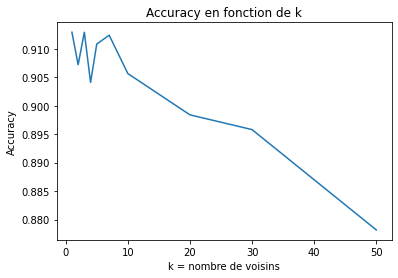

In [143]:
fig, ax = plt.subplots()  
ax.plot(n_neighbors, acc_knn)
plt.title("Accuracy en fonction de k")
plt.xlabel("k = nombre de voisins")
plt.ylabel("Accuracy")

Les résultats de knn sont bien meilleurs que ceux de decision tree.